<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 10**

## **Contenido**

- <a href="#ind"> Objetos de múltiples índices</a><br>
  - <a href="#agg"> Agrupamiento y agregaciones</a><br>
  - <a href="#piv"> Tablas pivote</a><br>
- <a href="#agr"> Agrupamientos alternativos</a><br>
- <a href="#exp"> Análisis exploratorio </a><br>

<p><a name="ind"></a></p>

# **Indexación jerárquica**

Hasta este punto, nos hemos centrado principalmente en datos unidimensionales y bidimensionales, almacenados en Series y DataFrames, respectivamente con un único índice para cada dimensión. A menudo, es útil ir más allá y almacenar datos de mayor dimensión, es decir, datos indexados por más de una o dos claves.

Podemos hacer uso de la *indexación jerárquica* (también conocida como multi-indexación) para incorporar múltiples niveles de índice dentro de un solo índice. De esta manera, datos de dimensiones superiores pueden ser representados de forma compacta dentro de objetos unidimensionales y bidimensionales como las Series y los DataFrames.



<p><a name="agg"></a></p>

## **Agrupamiento y agregaciones**

Consideremos el siguiente conjunto de datos

In [ ]:
import numpy as np
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Hasta el momento hemos visto agrupaciones por una clase. Pandas permite agrupar por múltiples claves, con lo cual obtendremos un objeto de mútiples índices.

Veamos, por ejemplo, la tasa de supervivencia por género y por clase:

In [ ]:
df = titanic.groupby(['Sex', 'Pclass']).Survived.mean()
df

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Note que en este caso obtenemos una serie con dos niveles de índices



In [ ]:
df.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['Sex', 'Pclass'])

Note que este es un objeto `MultiIndex` con dos niveles: el nivel *sex* o nivel 0, y el nivel *Pclass* o nivel 1. 

Una de las características importantes de la indexación jerárquica es que es posible seleccionar datos mediante una etiqueta "parcial" que identifica un subgrupo en los datos


In [ ]:
df["female"]

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

In [ ]:
df["male"]

Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64

Note que esta selección parcial no incluye el nivel del índice jerárquico en el resultado.

Si los indices son numericos tendremos conflictos ya que este se tomara como el elemento de la serie y no como el subíndice

In [ ]:
df[1]

0.9210526315789473

En este caso podemos escribir

In [ ]:
df[:, 1]

Sex
female    0.968085
male      0.368852
Name: Survived, dtype: float64

Para más elementos de indexación y segmentación puede visitar la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) de Pandas.



**Agregaciones**

Para datos indexados jerárquicamente, podemos controlar sobre qué subconjunto de datos calcular las agregaciones, de nuevo, utilizando el kwarg `level`




In [ ]:
df.max(level="Sex")

Sex
female    0.968085
male      0.368852
Name: Survived, dtype: float64

In [ ]:
df.max(level="Pclass")

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

También será posible realizar operaciones de agrupamiento sobre estos objetos, indicando el nivel sobre el cual queremos actuar utilizando el kwarg `level`.

Por ejemplo, agrupemos por el nivel *Pclass* y obtengamos el máximo, con lo cual obtendremos el mismo resultado anterior

In [ ]:
df.groupby(level="Pclass").max()

Pclass
1    0.968085
2    0.921053
3    0.500000
Name: Survived, dtype: float64

Ahora, volviendo al conjunto de datos `titanic`, podemos obtener múltiples agregaciones como ya habíamos visto. Por ejemplo, agrupemos por genero y clase y obtengamos el número de personas que sobrevivieron y qué porcentaje representa respecto al total de personas

In [ ]:
df = titanic.groupby(['Sex', 'Pclass']).Survived.agg(["mean","sum"])
df

mean  sum
Sex    Pclass               
female 1       0.968085   91
       2       0.921053   70
       3       0.500000   72
male   1       0.368852   45
       2       0.157407   17
       3       0.135447   47

Como ya hemos visto, podemos realizar las operaciones de agregación a través de un eje partícular con el kwarg `axis`

In [ ]:
df.mean(axis=1)

Sex     Pclass
female  1         45.984043
        2         35.460526
        3         36.250000
male    1         22.684426
        2          8.578704
        3         23.567723
dtype: float64

In [ ]:
df.mean(level="Sex")

,mean,sum
Sex,,
female,0.796379,77.666667
male,0.220569,36.333333


Las operaciones sobre estos objetos con múltiples índices, al igual que en el caso de las series y los dataframes de único índice, preservarán los índices:

In [ ]:
df

mean  sum
Sex    Pclass               
female 1       0.968085   91
       2       0.921053   70
       3       0.500000   72
male   1       0.368852   45
       2       0.157407   17
       3       0.135447   47

In [ ]:
# division por un entero
df / 2

mean   sum
Sex    Pclass                
female 1       0.484043  45.5
       2       0.460526  35.0
       3       0.250000  36.0
male   1       0.184426  22.5
       2       0.078704   8.5
       3       0.067723  23.5

In [ ]:
# division por un dataframe con los mismos indices
df / df**2

mean       sum
Sex    Pclass                    
female 1       1.032967  0.010989
       2       1.085714  0.014286
       3       2.000000  0.013889
male   1       2.711111  0.022222
       2       6.352941  0.058824
       3       7.382979  0.021277

<p><a name="piv"></a></p>

## **Tablas pivote**

Podemos convertir un conjunto de datos multi-índice a una representación bidimensional simple con el método `unstack`, especificando opcionalmente el nivel a usar con el kwarg `level`.

Volvamos a obtener la tasa de supervivencia por género y por clase

In [ ]:
df = titanic.groupby(['Sex', 'Pclass']).Survived.mean()
df

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [ ]:
df.unstack() #df.unstack(level="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
df.unstack(level="Sex")

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Lo opuesto a `unstack` es `stack`, que puede usarse por ejemplo para recuperar la serie original:



In [ ]:
df.unstack(level="Sex").stack()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
dtype: float64

Este GroupBy bidimensional es lo suficientemente común como para que Pandas incluya una función conveniente (`pivot_table`) que maneja este tipo de agregación multidimensional


In [ ]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Por defecto `pivot_table` aplica la función `mean()`. Para cambiar la función de agregación utilizamos el argumento `aggfunc`

In [ ]:
# modificando la funcion de agregacion
titanic.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc="sum")

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [ ]:
# aplicando multiples funciones de agregacion
titanic.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc=["sum","mean"])

sum              mean                    
Pclass   1   2   3         1         2         3
Sex                                             
female  91  70  72  0.968085  0.921053  0.500000
male    45  17  47  0.368852  0.157407  0.135447

Podemos agrupar por dos variables y aplicar una función correspondiente a cada una mediante un mapeo:

In [ ]:
titanic.pivot_table(index="Sex", columns="Pclass", aggfunc={"Survived":sum, "Fare":"mean"})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

La agrupación en tablas pivote se puede especificar con múltiples niveles. Podríamos estar interesados en ver la edad como una tercera dimensión. Seccionaremos la edad usando la función `pd.cut`

In [ ]:
age = pd.cut(titanic["Age"], [0,18,80], labels=["below", "above"])

titanic.pivot_table("Survived", index=["Sex", age], columns="Pclass")

Pclass               1         2         3
Sex    Age                                
female below  0.909091  1.000000  0.511628
       above  0.972973  0.900000  0.423729
male   below  0.800000  0.600000  0.215686
       above  0.375000  0.071429  0.133663

Podemos aplicar esta misma estrategia para trabajar con las columnas. Agreguemos información sobre la tarifa pagada usando `pd.qcut` para calcular automáticamente los cuantiles

In [ ]:
fare = pd.qcut(titanic["Fare"], 2, labels=["below", "above"])

titanic.pivot_table("Survived", index=["Sex", age], columns=["Pclass", fare])

Pclass           1                   2                   3          
Fare         below     above     below     above     below     above
Sex    Age                                                          
female below   NaN  0.909091  1.000000  1.000000  0.714286  0.318182
       above   NaN  0.972973  0.880000  0.914286  0.444444  0.391304
male   below   NaN  0.800000  0.000000  0.818182  0.260870  0.178571
       above   0.0  0.391304  0.098039  0.030303  0.125000  0.192308

A veces es útil calcular totales a lo largo de cada grupo. Esto se puede hacer a través del kwarg `margins`

In [ ]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc=sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


<p><a name="agr"></a></p>

## **Agrupamientos alternativos**

Los ejemplos presentados anteriormente expresan solo unas de las muchas opciones mediante las cuales se pueden definir los grupos. Hasta el momento hemos agrupado por alguna clave que corresponda a una columna. Podemos agrupar respecto al índice del dataframe de formas variadas.

In [ ]:
np.random.seed(42)

df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'c2': np.random.randint(0, 10, 6),
                   'c3': np.random.randint(10, 20, 6)})
df

,key,c2,c3
0,A,6,12
1,B,3,16
2,C,7,17
3,A,4,14
4,B,6,13
5,C,9,17


Por ejemplo, agrupuemos las filas 0 y 2 con índice "a"; las 1 y 3 con índice 1 ; las 4 y 5 con índice 10 y obtengamos la media

In [ ]:
# definimos la forma del agrupamiento
L = ["a", 1, "a", 1, 10, 10]   

df.groupby(L).mean()

,c2,c3
1,3.5,15.0
10,7.5,15.0
a,6.5,14.5


Otro método es el de proporcionar un diccionario que asigne los valores de los índices a las claves de grupo. Para ver esto, hagamos que la columna *key* sea el índice

In [ ]:
df2 = df.set_index('key')   
df2

,c2,c3
key,,
A,6,12
B,3,16
C,7,17
A,4,14
B,6,13
C,9,17


vamos a agrupar por vocales y por consonantes, definiendo el mapeo mediante un diccionario

In [ ]:
mapeo = {'A': 'vocal', 'B': 'consonante', 'C': 'consonante'} 

de esta manera "A" se agrupara como "vocal", mientras que "B" y "C" se agruparan como "consonante"

In [ ]:
df2.groupby(mapeo).sum()

,c2,c3
consonante,25,63
vocal,10,26


Análogamente al mapeo, es posible pasar cualquier función de Python que ingrese el valor del índice y genere el grupo. Por ejemplo, si pasamos `str.lower`, agruparemos por el índice pero aplicando el método `lower` a cada letra

In [ ]:
df2.groupby(str.lower).mean()

cualquiera de las opciones anteriores se pueden combinar para agrupar con índice múltiple

In [ ]:
df2.groupby([str.lower, mapeo]).mean()

,,c2,c3
a,vocal,5.0,13.0
b,consonante,4.5,14.5
c,consonante,8.0,17.0


<p><a name="exp"></a></p>

# **Análisis exploratorio**

[Seaborn](https://seaborn.pydata.org/) proporciona una API, además de Matplotlib, que ofrece múltiples opciones para el estilo de gráficos. Define funciones simples de alto nivel para tipos de gráficos estadísticos comunes y se integra de manera adecuada con los objetos de Pandas.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Utilicemos el conjunto de datos NBA para realizar algunas visualizaciones básicas con seaborn

In [ ]:
nba = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/nba.csv", index_col="Unnamed: 0")
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Respondamos a las siguientes preguntas:

* Examine el conjunto de datos

In [ ]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 35.8+ KB


* Examine las variables numéricas y categóricas (construya un DataFrame para los dos tipos de variable)

In [ ]:
nba.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [ ]:
nba.describe(include="object")

,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Norman Powell,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


Con el método `select_dtypes` podemos seleccionar variables del dataframe seguún su tipo

In [ ]:
num_data = nba.select_dtypes(exclude="object")
num_data

,Number,Age,Weight,Salary
0,0.0,25.0,180.0,7730337.0
1,99.0,25.0,235.0,6796117.0
2,30.0,27.0,205.0,NaN
3,28.0,22.0,185.0,1148640.0
4,8.0,29.0,231.0,5000000.0
...,...,...,...,...
453,8.0,26.0,203.0,2433333.0
454,25.0,24.0,179.0,900000.0
455,21.0,26.0,256.0,2900000.0
456,24.0,26.0,231.0,947276.0


In [ ]:
cat_data = nba.select_dtypes(include="object")
cat_data

,Name,Team,Position,Height,College
0,Avery Bradley,Boston Celtics,PG,6-2,Texas
1,Jae Crowder,Boston Celtics,SF,6-6,Marquette
2,John Holland,Boston Celtics,SG,6-5,Boston University
3,R.J. Hunter,Boston Celtics,SG,6-5,Georgia State
4,Jonas Jerebko,Boston Celtics,PF,6-10,NaN
...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,PG,6-3,Butler
454,Raul Neto,Utah Jazz,PG,6-1,NaN
455,Tibor Pleiss,Utah Jazz,C,7-3,NaN
456,Jeff Withey,Utah Jazz,C,7-0,Kansas


* ¿Qué relación hay entre las variables numéricas?

Podemos utilizar la función `pairplot` de seaborn para obtener gráficos de dispersión de todas las combinaciones de variables numericas en el conjunto de datos. Con el kwarg `diag_kind` podemos especificar qué tipo de gráfico queremos tener en la diagonal de la figura

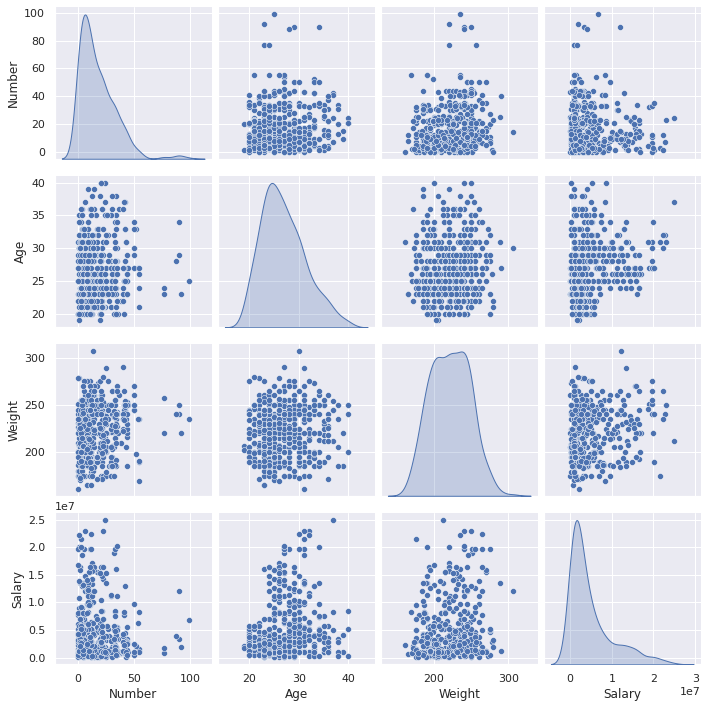

In [ ]:
sns.pairplot(data=num_data, diag_kind="kde");

Para obtener un único gráfico de dispersión, utilizamos la función `scatterplot`

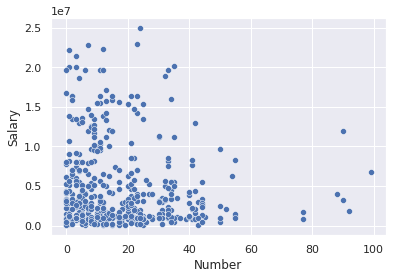

In [ ]:
sns.scatterplot(data=nba, x="Number", y="Salary");


* ¿Cuáles son las cinco universidades con más jugadores? Cree un gráfico de barras para visualizar esta información.

Esta visualización la podemos realizar facilmente con el método `plot` de las series de Pandas

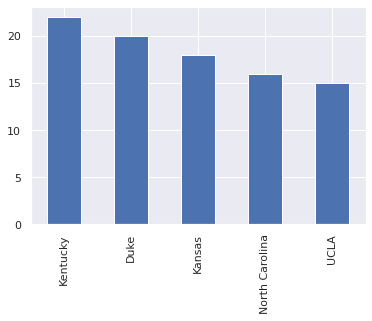

In [ ]:
cat_data.College.value_counts().head().plot(kind="bar");

* ¿Qué equipos pagan los salarios mas altos? (sumando toda la nómina de sus jugadores). 

Agrupemos por equipo y obtengamos la suma sobre los salarios

In [ ]:
team_salary = nba.groupby("Team", as_index=False)[["Salary"]].sum().sort_values(by="Salary", ascending=False).head()
team_salary

,Team,Salary
5,Cleveland Cavaliers,106988689.0
12,Los Angeles Clippers,94854640.0
20,Oklahoma City Thunder,93765298.0
9,Golden State Warriors,88868997.0
4,Chicago Bulls,86783378.0


Las visualizaciones de variables categóricas las podemos obtener con la función `sns.catplot`, indicando con el kwarg `kind` qué tipo de gráfico queremos

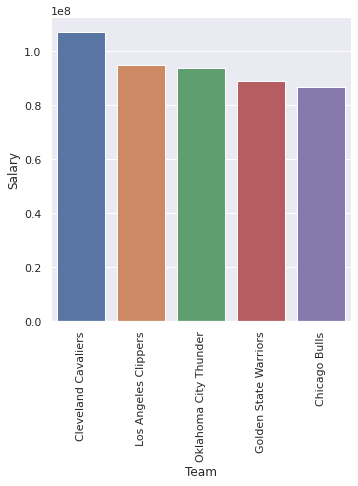

In [ ]:
sns.catplot(data=team_salary, x="Team", y="Salary", kind="bar")
plt.xticks(rotation=90);

* Separe la variable *Age* en tres grupos y cree una nueva columna llamada *Age-Group* con esta información. Muestre un gráfico de barras con el número de jugadores por grupo de edad diferenciando en esta (mediante un código de color) la posición.

In [ ]:
nba["Age_group"] = pd.cut(nba.Age, bins=3, labels=["baja","media","alta"])
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_group
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,baja
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,baja
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,media
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,baja
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,media


Con el kwarg `hue` podemos diferenciar los datos para una variable particular mediante un código de color

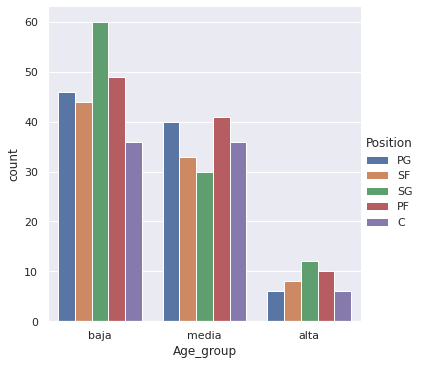

In [ ]:
sns.catplot(data=nba, x="Age_group", kind="count", hue="Position");

* Construya dos gráficos de caja en los que se muestren los salarios vs las posiciones de los jugadores y salarios vs grupo de edad en la misma figura, de manera que compartan el eje del salario. ¿Cuál característica es más importante a la hora de definir el salario?

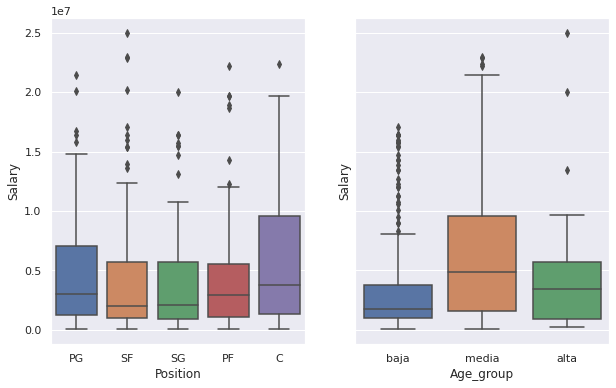

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,6), sharey=True)

sns.boxplot(data=nba, x="Position", y="Salary", ax=ax[0]);
sns.boxplot(data=nba, x="Age_group", y="Salary", ax=ax[1]);

* Construya una tabla pivote que muestre el salario promedio de los jugadores por equipo y posición para para los cinco equipos que pagan mejores salarios. Visualice este resultado mediante un mapa de calor.

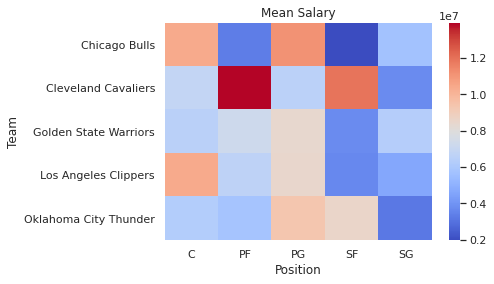

In [ ]:
# filtramos los datos utilizando la variable team_salary
filtered_data = nba.loc[nba.Team.isin(team_salary.Team)]

# creamos una tabla dinamica con la informacion
table = filtered_data.pivot_table("Salary", index="Team", columns="Position")

# visualizamos la tabla con un mapa de calor
sns.heatmap(table, cmap="coolwarm")
plt.title("Mean Salary");

**Ejercicio 1**

Importe el dataset *u.user* del respositorio del curso

* Importar el dataset, asignarlo a una variable llamada *users* y usar el *user_id* como índice.
* ¿Cuál es la edad media de los usuarios?
* ¿Cuántas ocupaciones diferentes hay en este conjunto de datos?
* ¿Cuál es la ocupación más frecuente?
* ¿Cuál es la edad media por ocupación?
* Para cada ocupación calcule las edades mínimas y máximas
* Para cada combinación de ocupación y género calcule la edad media
* Obtenga la proporción de hombres por ocupación (de mayor a menor)
* Para cada ocupación muestre el porcentaje de mujeres y hombres en un único objeto

**Ejercicio 2:** 
A continuación cargaremos dos conjuntos de datos con información referente a tarjetas de credito del mes 09 del 2017.

# **estado_201709.csv**

* ID:​ Nro. de identificación.
* Franquicia:​ A, B, C.
* Tipo Tarjeta:​ Representa el tipo de tarjeta.
* Número Tarjeta:​ Indica el número de la TC.
* Cupo Global:​ Indica el cupo de crédito que tiene la tarjeta.
* Disponible: Indica del cupo global cuanto tiene a ese corte disponible para realizar compras o avances.
* Fecha Emisión:​ Fecha en la que se compró la tarjeta.
* Fecha Ult Aumento Cupo: Fecha en la que se realizó el último aumento de cupo. Cuando está en 0 significa que nunca se ha realizado un aumento de cupo.
* Total Mes en Mora: Número de meses que ha estado en mora la TC (durante toda
la vida de la tarjeta).
*Altura de Mora: ​Indica la mora actual que tiene la TC. Viene en rango:
  ○ 0 No está en mora,
  ○ 30 está en mora hace menos de 30 días,
  ○ 60 está en mora hace menos de 60 días.
  ○ 90 está en mora hace menos de 90 días.
*Código Vendedor:​ Indica el código del vendedor que emitió la TC.
*Código Estado Tarjeta: Indica si la tarjeta está Activa o vigente (Codigo=0) y código = 1 (indica que la tarjeta está cancelada por el cliente).

# **transaccion_201709.csv**

* ID:​ Nro de identificación.
* Número Tarjeta:​ Indica el número de la TC que realizó la transacción.
* Fecha de transacción​: Indica la fecha en que se realizó la transacción.
* Codigo Transacción:
  ○ AV : AVANCE
  ○ AB: ABONO
  ○ CN: COMPRA NACIONAL
  ○ CI: COMPRA INTERNAL
  ○ CM: CUOTA DE MANEJO.
* Valor Transacción:​ Indica el valor de la transacción.
* Numero Cuotas Diferidas: Indica el número de cuotas en el que el cliente desea pagar la compra.




1) Realice un análisis exploratorio inicial de los conjuntos de datos para familiarizarse con ellos

2) Use el método `merge` para combinar los datasets en el `NUMERO TARJETA' (en la intersección)

3) Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?

4) Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?

5) Realice un bineo del total de meses en mora partiendolos en tres categorías: 'baja mora', 'media mora', 'alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta? Realice un mapa de calor para la visualización.